<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_30_Function_Transformer_Log_Transform_Reciprocal_Transform_Square_Root_Transform/Lecture_30_pracice_during_studying_artical_on_FunctionTransformer_in_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🎓 Lecture:30 FunctionTransformer in Machine Learning**


---



🔧 Log Transform | Reciprocal Transform | Square Root Transform


# **✅ What is FunctionTransformer?**


---



FunctionTransformer is a tool from sklearn.preprocessing

It lets you apply any custom or built-in function to your data during preprocessing.

Think of it as a wrapper to apply mathematical operations like:

log(), sqrt(), 1/x, etc.

You can even use np.vectorize for custom logic.

# **🔧 Why Use Transformations?**

Some machine learning models perform better when:

Features are normalized or scaled.

Outliers are reduced (log/sqrt helps).

Data is made more linear or less skewed.

# **🧠 When to Use:**

| Transform        | Use when...                                     |
| ---------------- | ----------------------------------------------- |
| Log              | Data is highly **right-skewed** (long tail)     |
| Reciprocal (1/x) | Data has **extreme high values**                |
| Sqrt             | **Moderate skewness**, less aggressive than log |


**🧪 Dataset: Seaborn tips**

Step 1: Load Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

df = sns.load_dataset('tips')
df = df[['total_bill', 'size']]
print(df.head())


   total_bill  size
0       16.99     2
1       10.34     3
2       21.01     3
3       23.68     2
4       24.59     4


# **🔧 Step 2: Use FunctionTransformer**

In [2]:
from sklearn.preprocessing import FunctionTransformer


# **✅ 1. Log Transform**

Apply log to total_bill:

In [3]:
log_transformer = FunctionTransformer(np.log1p, validate=True)  # log1p = log(1 + x)
log_total_bill = log_transformer.fit_transform(df[['total_bill']])

df['log_total_bill'] = log_total_bill


# **✅ 2. Reciprocal Transform**

In [4]:
reciprocal_transformer = FunctionTransformer(lambda x: 1 / (x + 1), validate=True)
reciprocal_total_bill = reciprocal_transformer.fit_transform(df[['total_bill']])

df['reciprocal_total_bill'] = reciprocal_total_bill


# **✅ 3. Square Root Transform**

In [5]:
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
sqrt_total_bill = sqrt_transformer.fit_transform(df[['total_bill']])

df['sqrt_total_bill'] = sqrt_total_bill


# **✅ View Transformed Data**

In [6]:
print(df[['total_bill', 'log_total_bill', 'reciprocal_total_bill', 'sqrt_total_bill']].head())


   total_bill  log_total_bill  reciprocal_total_bill  sqrt_total_bill
0       16.99        2.889816               0.055586         4.121893
1       10.34        2.428336               0.088183         3.215587
2       21.01        3.091497               0.045434         4.583667
3       23.68        3.205993               0.040519         4.866210
4       24.59        3.242202               0.039078         4.958831


# **📊 Optional: Visual Comparison (Skewness Fix)**

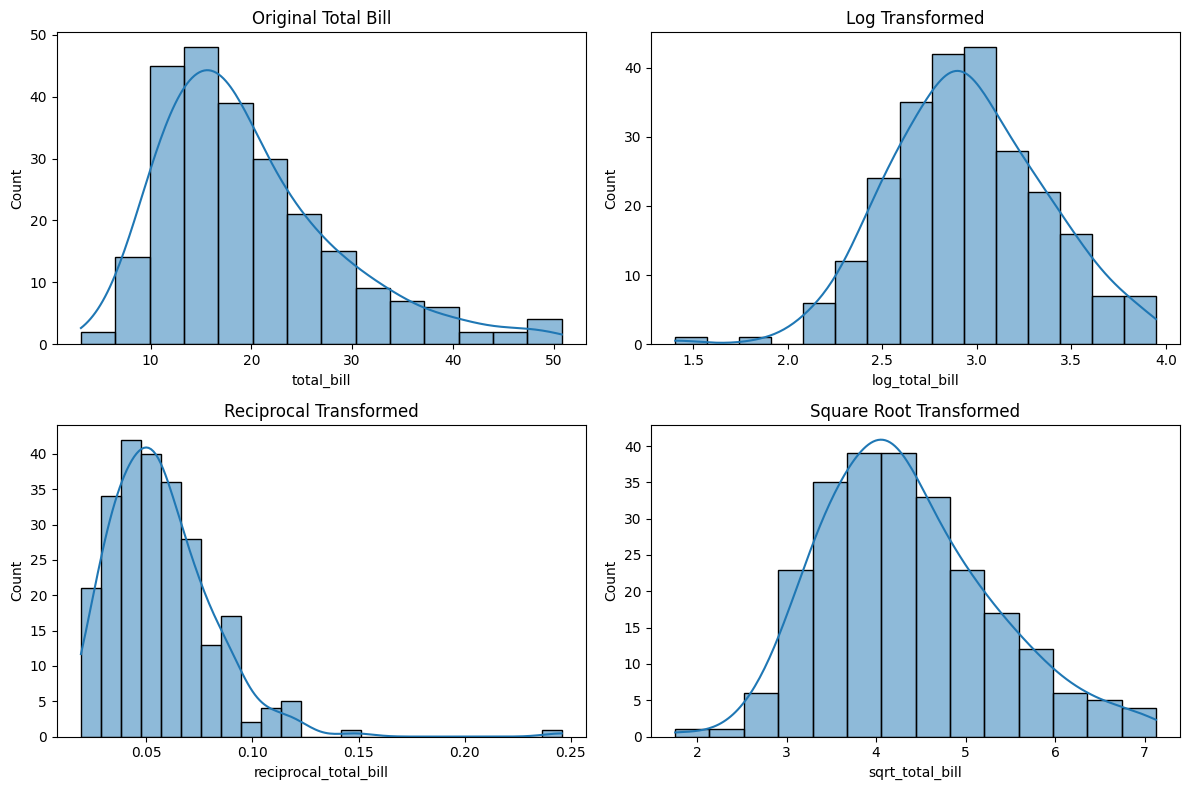

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Original
plt.subplot(2, 2, 1)
sns.histplot(df['total_bill'], kde=True)
plt.title("Original Total Bill")

# Log
plt.subplot(2, 2, 2)
sns.histplot(df['log_total_bill'], kde=True)
plt.title("Log Transformed")

# Reciprocal
plt.subplot(2, 2, 3)
sns.histplot(df['reciprocal_total_bill'], kde=True)
plt.title("Reciprocal Transformed")

# Square Root
plt.subplot(2, 2, 4)
sns.histplot(df['sqrt_total_bill'], kde=True)
plt.title("Square Root Transformed")

plt.tight_layout()
plt.show()


# **✅ Summary Table**

| Transformation | Syntax                  | Purpose                         |
| -------------- | ----------------------- | ------------------------------- |
| Log            | `np.log1p(x)`           | Reduce skew, stabilize variance |
| Reciprocal     | `1 / (x+1)`             | Handle extreme outliers         |
| Square Root    | `np.sqrt(x)`            | Gentle skew reduction           |
| Tool           | `FunctionTransformer()` | Apply any function easily       |
